### **Algerian Forest Fire Data Analysis**

In [173]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [174]:
# Load the dataset
df=pd.read_csv(r'/workspaces/Algerian_BDMProject/Dataset/Algerian_forest_fires_cleaned.csv')

# Display the first few rows of the dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [176]:
# Check for missing values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [177]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [178]:
# Drop day, month and year columns as these are not relevant
df.drop(['day', 'month', 'year'], axis=1, inplace=True)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [179]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [180]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

**Feature Engineering**

In [181]:
# Encode the Categorical feature, Classes, to numerical value
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [182]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [183]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [184]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

**Exploratory Data Analysis**

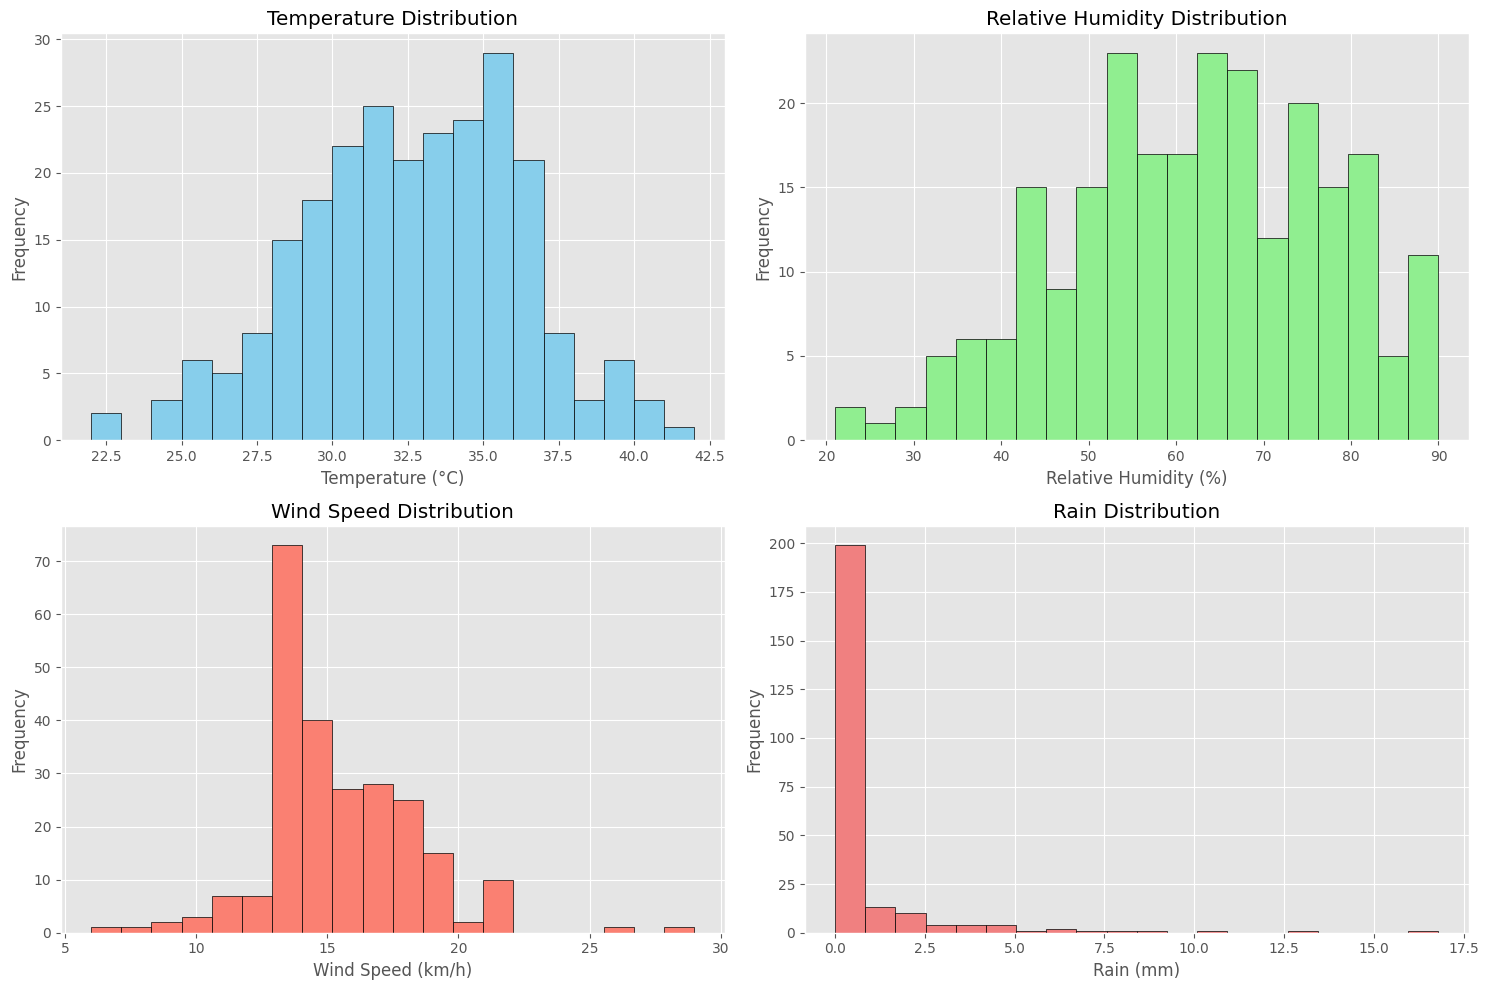

In [185]:
# Set up the plotting environment
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Histogram for Temperature
axs[0, 0].hist(df['Temperature'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Temperature Distribution')
axs[0, 0].set_xlabel('Temperature (°C)')
axs[0, 0].set_ylabel('Frequency')

# Histogram for Relative Humidity (RH)
axs[0, 1].hist(df['RH'], bins=20, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Relative Humidity Distribution')
axs[0, 1].set_xlabel('Relative Humidity (%)')
axs[0, 1].set_ylabel('Frequency')

# Histogram for Wind Speed (Ws)
axs[1, 0].hist(df['Ws'], bins=20, color='salmon', edgecolor='black')
axs[1, 0].set_title('Wind Speed Distribution')
axs[1, 0].set_xlabel('Wind Speed (km/h)')
axs[1, 0].set_ylabel('Frequency')

# Histogram for Rain
axs[1, 1].hist(df['Rain'], bins=20, color='lightcoral', edgecolor='black')
axs[1, 1].set_title('Rain Distribution')
axs[1, 1].set_xlabel('Rain (mm)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

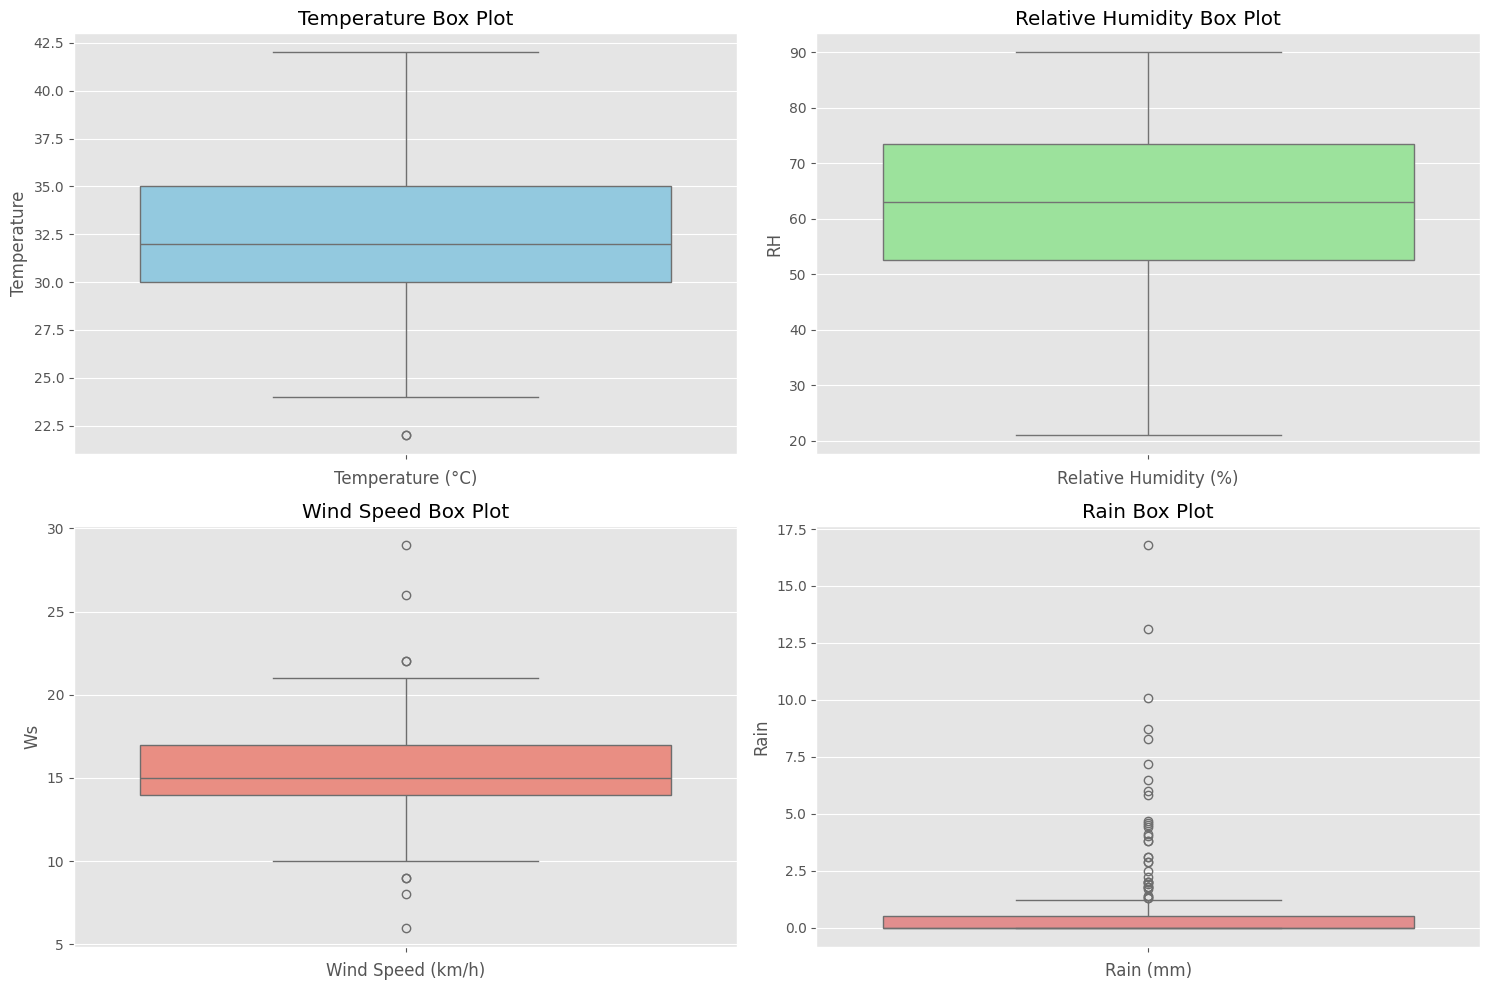

In [186]:
# Box plots to identify outliers
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Box plot for Temperature
sns.boxplot(df['Temperature'], ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Temperature Box Plot')
axs[0, 0].set_xlabel('Temperature (°C)')

# Box plot for Relative Humidity (RH)
sns.boxplot(df['RH'], ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Relative Humidity Box Plot')
axs[0, 1].set_xlabel('Relative Humidity (%)')

# Box plot for Wind Speed (Ws)
sns.boxplot(df['Ws'], ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Wind Speed Box Plot')
axs[1, 0].set_xlabel('Wind Speed (km/h)')

# Box plot for Rain
sns.boxplot(df['Rain'], ax=axs[1, 1], color='lightcoral')
axs[1, 1].set_title('Rain Box Plot')
axs[1, 1].set_xlabel('Rain (mm)')

plt.tight_layout()
plt.show()

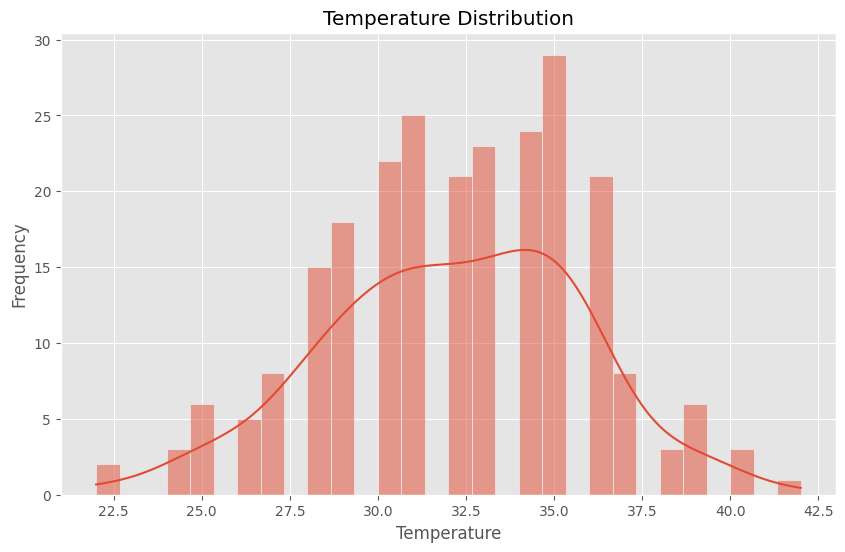

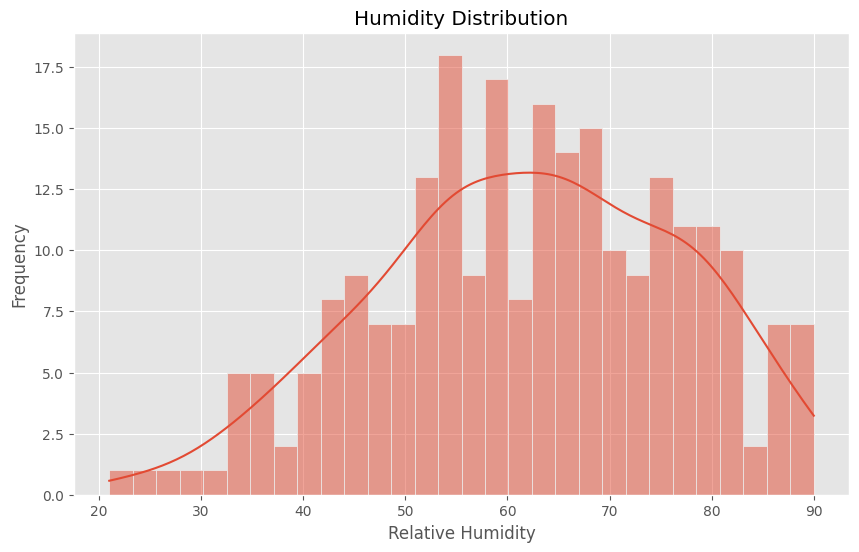

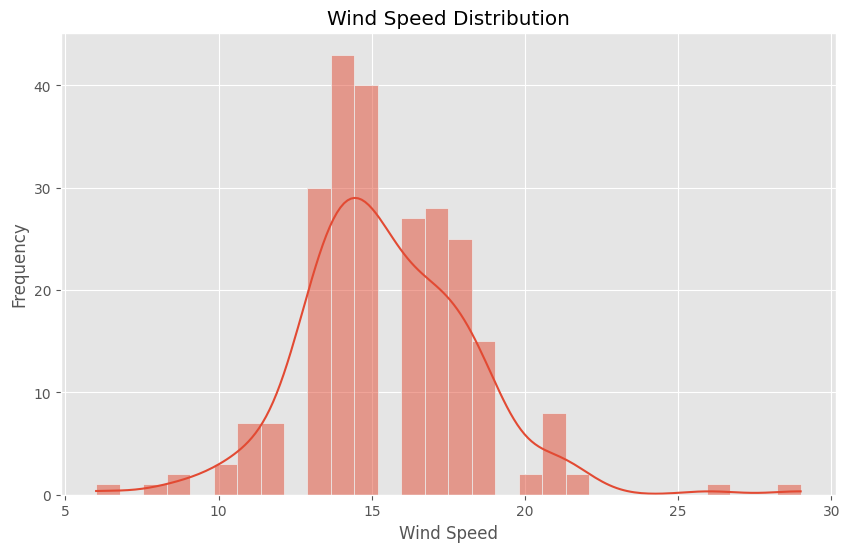

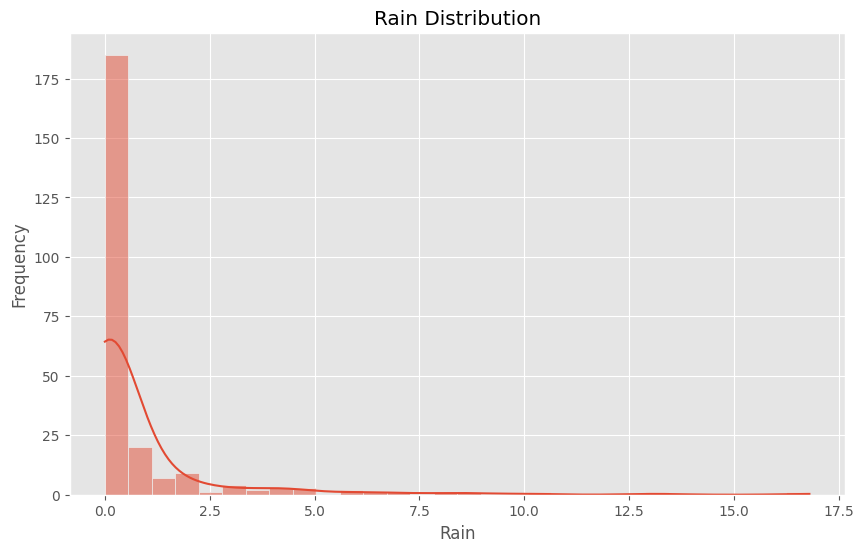

In [187]:
# Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], kde=True, bins=30)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Humidity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['RH'], kde=True, bins=30)
plt.title('Humidity Distribution')
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.show()

# Wind Speed Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Ws'], kde=True, bins=30)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

# Rain Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Rain'], kde=True, bins=30)
plt.title('Rain Distribution')
plt.xlabel('Rain')
plt.ylabel('Frequency')
plt.show()

**Insights from Visualizations**

Temperature, relative humidity, and wind speed show a few outliers, but the distributions are relatively tight around the median.
Rain has a significant number of outliers, indicating that most days are dry, with occasional heavy rainfall.

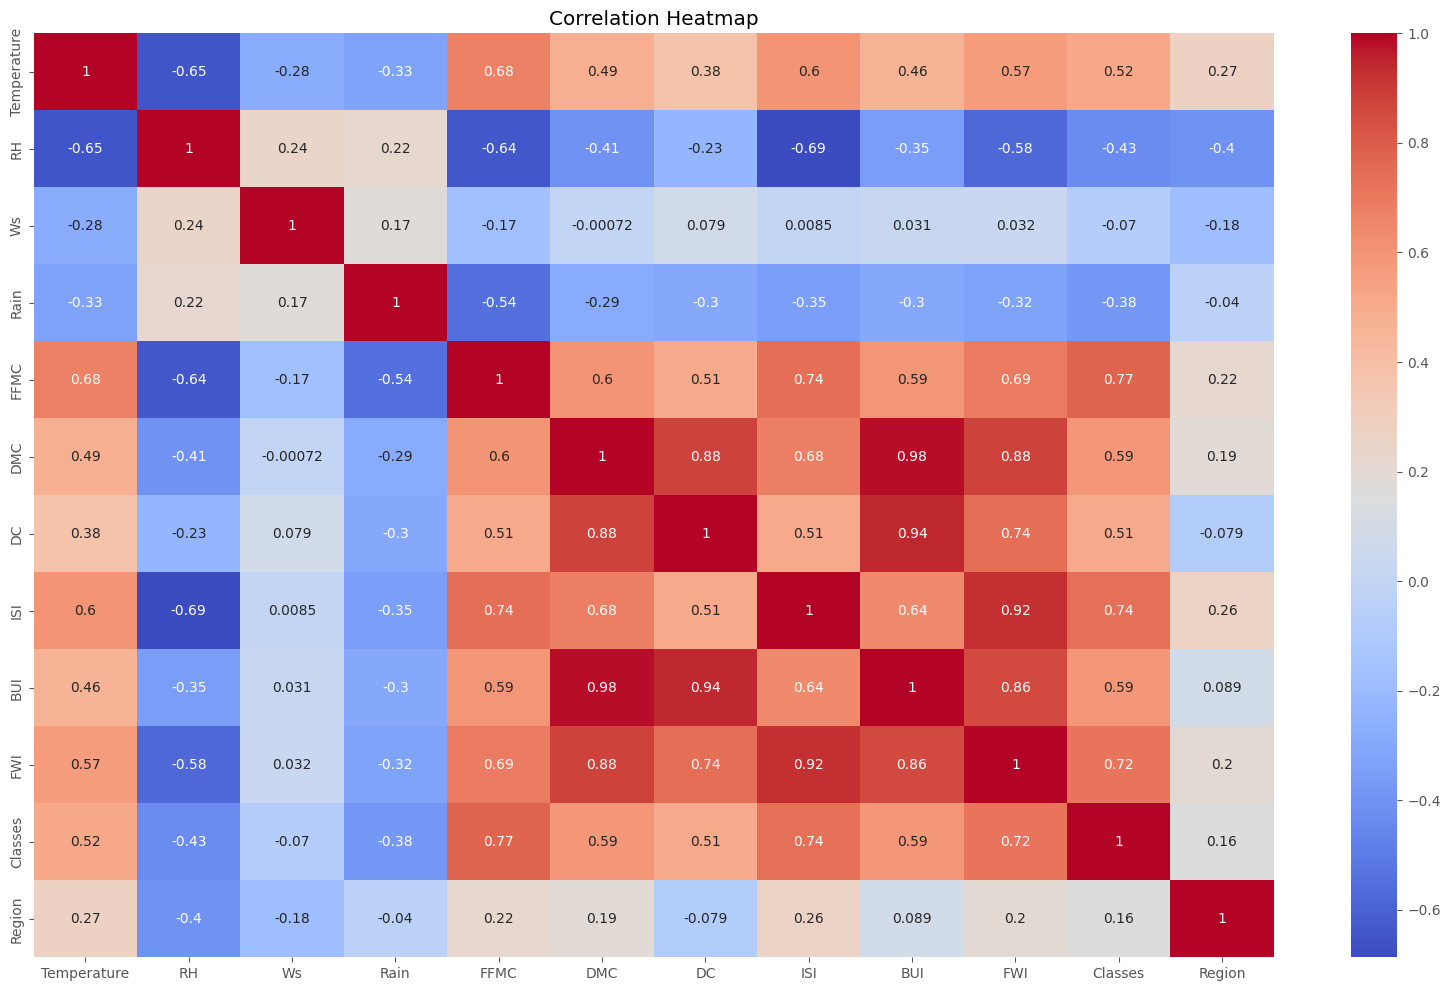

In [188]:
# Correlation Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Analysis: (FWI) is highly correlated with DMC, DC, and BUI.
Since DMC and BUI have multicollinearity, dropping DC and BUI can help simplify the model without losing significant information.

In [189]:
# Drop 'DC' and 'BUI' columns
df.drop(columns=['DC', 'BUI'], axis=1, inplace=True)

In [190]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,0,0


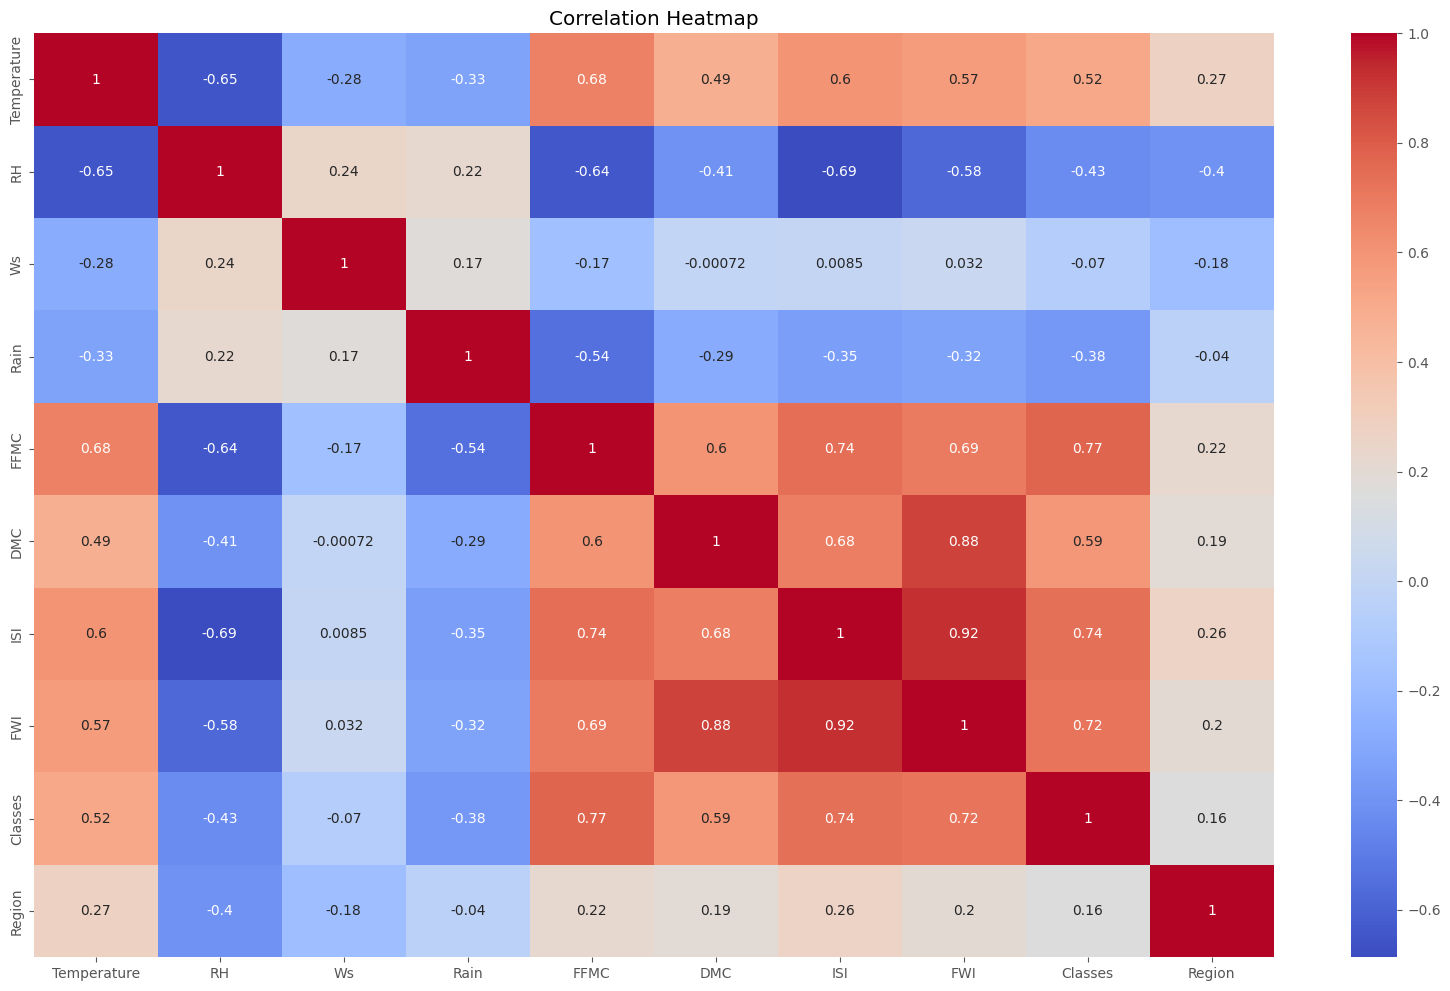

In [191]:
# Display the updated correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Model Development and Analysis**

In [192]:
# Split the data into features (X) and target variable (y)
X=df.drop('FWI',axis=1)
y=df['FWI']

# Display shapes of X and y
X.shape, y.shape

((243, 9), (243,))

In [193]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Multiple Linear Regression

In [195]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Train the scaled training data using Multiple Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [196]:
# Predict on test set

y_pred_lr = lr.predict(X_test_scaled)

In [197]:
# Evaluate the model

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2: {r2_lr}")

Linear Regression MSE: 0.5882990110708693
Linear Regression R2: 0.9805895859259882


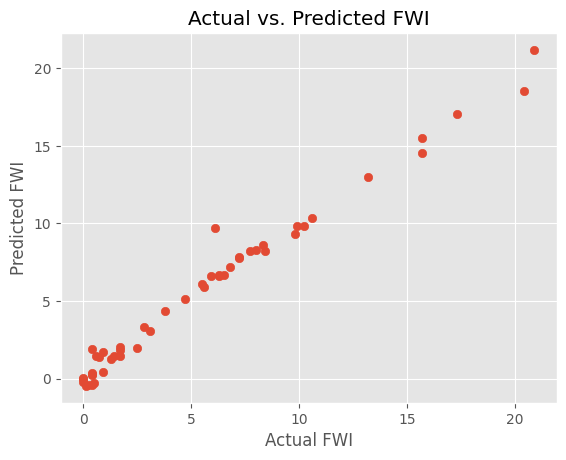

In [198]:
# Visualization
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs. Predicted FWI')
plt.show()

Polynomial Regression

In [199]:
from sklearn.preprocessing import PolynomialFeatures

# Transform the features to polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [200]:
# Train the model
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

LinearRegression()

In [201]:
# Predict on test set
y_pred_poly = poly_lr.predict(X_test_poly)

In [202]:
# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Polynomial Regression R2: {r2_poly}")

Polynomial Regression MSE: 0.22396372956190522
Polynomial Regression R2: 0.9926105115824632


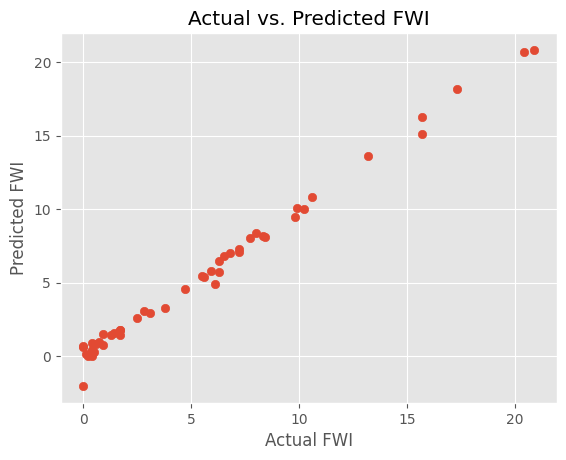

In [203]:
# Visualization
plt.scatter(y_test, y_pred_poly)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs. Predicted FWI')
plt.show()

Decision Tree Regressor

In [204]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [205]:
# Predict on test set
y_pred_dt = dt.predict(X_test_scaled)

In [206]:
# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor MSE: {mse_dt}")
print(f"Decision Tree Regressor R2: {r2_dt}")

Decision Tree Regressor MSE: 3.7012244897959174
Decision Tree Regressor R2: 0.8778813178743261


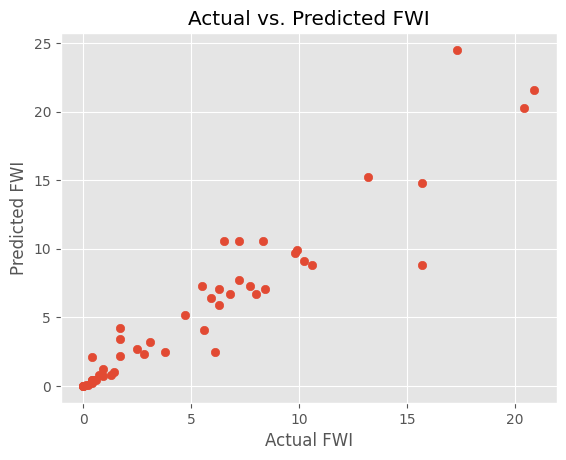

In [207]:
# Visualization
plt.scatter(y_test, y_pred_dt)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs. Predicted FWI')
plt.show()

Regularization Techniques

Lasso Regression

In [208]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
lasso = Lasso()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, params, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

In [209]:
# Predict on test set
y_pred_lasso = lasso_cv.predict(X_test_scaled)

In [210]:
# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R2: {r2_lasso}")
print(f"Best alpha for Lasso: {lasso_cv.best_params_}")

Lasso Regression MSE: 0.8970474045515048
Lasso Regression R2: 0.9704027012816706
Best alpha for Lasso: {'alpha': 0.1}


Ridge Regression

In [211]:
from sklearn.linear_model import Ridge

# Hyperparameter tuning using GridSearchCV
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

In [212]:
# Predict on test set
y_pred_ridge = ridge_cv.predict(X_test_scaled)

In [213]:
# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R2: {r2_ridge}")
print(f"Best alpha for Ridge: {ridge_cv.best_params_}")

Ridge Regression MSE: 0.841986797932755
Ridge Regression R2: 0.9722193780965623
Best alpha for Ridge: {'alpha': 10}


Save the Models Using Pickle

In [214]:
import pickle

# Save the models
models = {
    'linear_regression': lr,
    'polynomial_regression': poly_lr,
    'decision_tree': dt,
    'lasso': lasso_cv.best_estimator_,
    'ridge': ridge_cv.best_estimator_
}

for name, model in models.items():
    with open(f'{name}.pkl', 'wb') as file:
        pickle.dump(model, file)


Load and Test the Models

In [215]:
# Load the model
with open('linear_regression.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test the model
y_pred_loaded = loaded_model.predict(X_test_scaled)

# Evaluate the loaded model
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)

print(f"Loaded Linear Regression MSE: {mse_loaded}")
print(f"Loaded Linear Regression R2: {r2_loaded}")

Loaded Linear Regression MSE: 0.5882990110708693
Loaded Linear Regression R2: 0.9805895859259882
